In [1]:
import numpy as np
from astropy.table import Table, vstack

In [2]:
import healpy as hp

In [3]:
from pfstarget import cuts as Cuts
from pfstarget import util as U
from pfstarget import extinction as E

In [4]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [5]:
tract = Table.read('/Users/hahnchanghoon/projects/pfstarget/bin/hsc/sql/database/s23-colorterm/sql/0.fits')
# for i in range(1,3): 
#     _tract = Table.read('/Users/hahnchanghoon/projects/pfstarget/bin/hsc/sql/database/s23-colorterm/sql/%i.fits' % i)
#     tract = vstack([tract, _tract])

Text(0, 0.5, 'Dec')

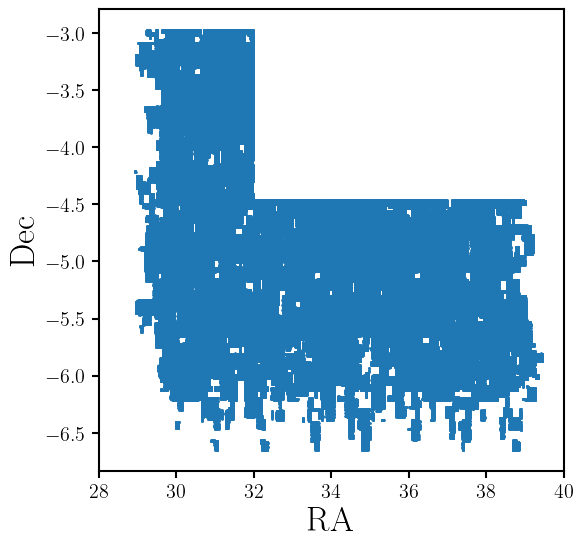

In [6]:
fig = plt.figure(figsize=(6, 6))
sub = fig.add_subplot(111)
sub.scatter(tract['ra'], tract['dec'], s=1)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(28, 40)
sub.set_ylabel('Dec', fontsize=25)
#sub.set_ylim(-6, -4.5)

In [7]:
hsc = Cuts._prepare_hsc(tract,  dust_extinction='desi')

In [8]:
is_pfscosmo = Cuts.isCosmology(hsc)

In [9]:
targets = hsc[is_pfscosmo] 

Text(0, 0.5, 'Dec')

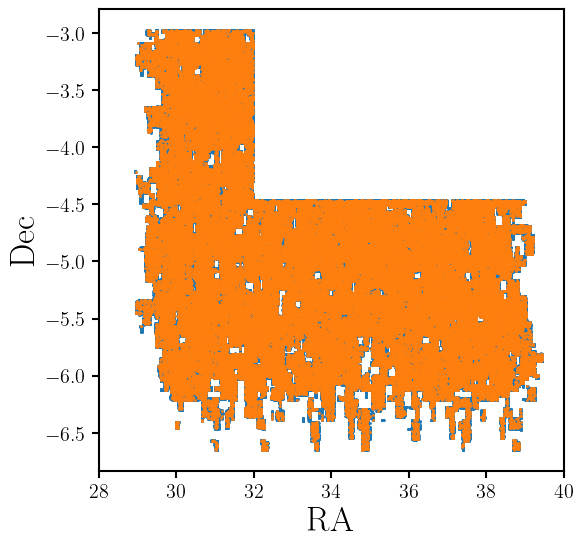

In [10]:
fig = plt.figure(figsize=(6, 6))
sub = fig.add_subplot(111)
sub.scatter(tract['ra'], tract['dec'], s=1)
sub.scatter(targets['RA'], targets['DEC'], s=1)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(28, 40)
sub.set_ylabel('Dec', fontsize=25)
#sub.set_ylim(-6, -4.5)

Text(0, 0.5, '$i-z$')

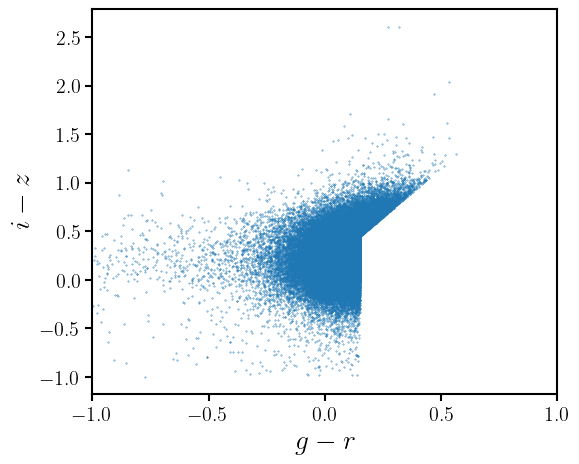

In [11]:
fig = plt.figure(figsize=(6,5)) 
sub = fig.add_subplot(111)

sub.scatter(targets['G_MAG'] - targets['R_MAG'], targets['I_MAG'] - targets['Z_MAG'], s=0.1)
sub.set_xlabel('$g-r$', fontsize=20)
sub.set_xlim(-1, 1)
sub.set_ylabel('$i-z$', fontsize=20)

# examine target density

In [36]:
hpix = hp.ang2pix(128, np.radians(90.0 - targets['DEC']), np.radians(targets['RA']))

In [52]:
uhpix, nhpix = np.unique(hpix, return_counts=True)
npix = hp.nside2npix(128)  # Total number of pixels
hp_map = np.zeros(npix)
hp_map[uhpix] = nhpix

In [41]:
_theta, _phi = hp.pix2ang(128, uhpix)
hp_ra = _phi / np.pi * 180.
hp_dec = 90. - (_theta / np.pi * 180.)

(-10.0, 2.0)

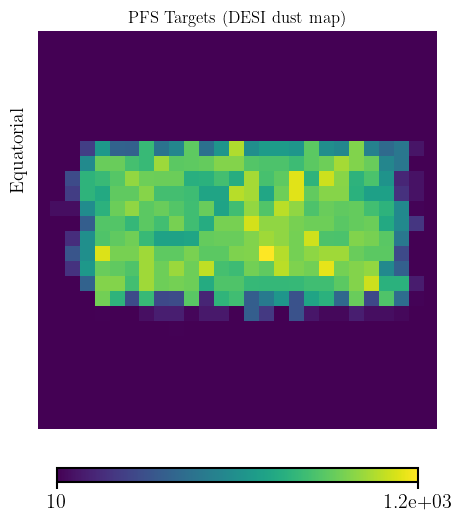

In [77]:
hp.cartview(hp_map, title="PFS Targets (DESI dust map)", cmap="viridis", coord=['C'], min=10, max=1.2e3)
plt.xlim(-28, -40)
plt.ylim(-10, 2)

In [64]:
hsc_sfd98 = Cuts._prepare_hsc(tract,  dust_extinction='sfd98')
targets_sfd98 = hsc_sfd98[Cuts.isCosmology(hsc_sfd98)] 

/Users/hahnchanghoon/projects/pfstarget/src/pfstarget/cuts.py:85: RuntimeWarning: invalid value encountered in subtract
  cuts &= ((objects['G_MAG'] - objects['R_MAG'] > -1) &
/Users/hahnchanghoon/projects/pfstarget/src/pfstarget/cuts.py:51: RuntimeWarning: invalid value encountered in subtract
  cuts &= (((objects['G_MAG'] - objects['R_MAG']) < g_r_cut) | # g-r cut (for 1.6 < z < 2.4 ELGs)
/Users/hahnchanghoon/projects/pfstarget/src/pfstarget/cuts.py:53: RuntimeWarning: invalid value encountered in subtract
  > color_slope * (objects['G_MAG'] - objects['R_MAG'])- color_yint))


In [65]:
_hpix = hp.ang2pix(128, np.radians(90.0 - targets_sfd98['DEC']), np.radians(targets_sfd98['RA']))
_uhpix, _nhpix = np.unique(_hpix, return_counts=True)
hp_map_sfd98 = np.zeros(npix)
hp_map_sfd98[_uhpix] = _nhpix

(-10.0, 2.0)

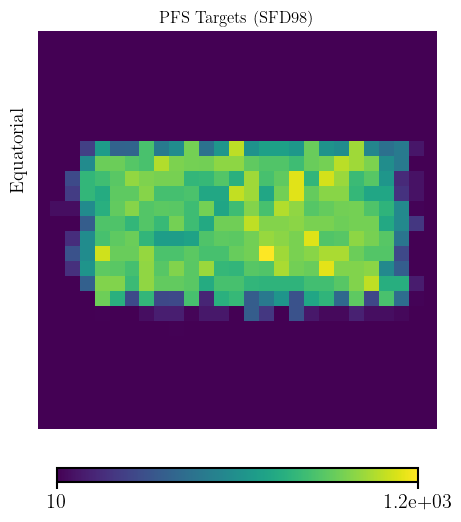

In [76]:
hp.cartview(hp_map_sfd98, title="PFS Targets (SFD98)", cmap="viridis", coord=['C'], min=10, max=1.2e3)
plt.xlim(-28, -40)
plt.ylim(-10, 2)

(-10.0, 2.0)

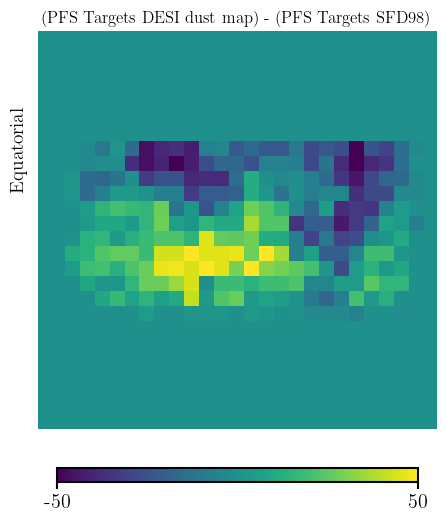

In [78]:
hp.cartview(hp_map - hp_map_sfd98, title="(PFS Targets DESI dust map) - (PFS Targets SFD98)", cmap="viridis", coord=['C'], min=-50, max=50)
plt.xlim(-28, -40)
plt.ylim(-10, 2)